<a href="https://colab.research.google.com/github/coolphotography/Bank-Marketing-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [3]:
# Import libraries
# Basic libs
import pandas as pd
import numpy as np
from numpy import math

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# Ignore  the warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

### **Data Set Overview**

In [4]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load the data**

In [5]:
# Read the data
bank_df = pd.read_csv('/content/drive/MyDrive/Bank Marketing Effectiveness Prediction - V Bhavya Reddy/bank-full.csv', sep = ';')

**First Five Observations**

In [6]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Last Five Observations**

In [7]:
bank_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


**Shape of the Data**

In [8]:
bank_df.shape

(45211, 17)

The provided data consists of over 45211 observations with 17 column variables.

**Feature Data Types**

In [9]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Data consists of 17 columns variables and 7 of them are Numeric Columns.

In [10]:
# Feature Statistics Summary
# Provides the statistical details for each column.
bank_df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


**Data Cleaning**

In [11]:
# For missing data
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Here we found that no missing values are available in whole dataset.

In [12]:
bank_df.loc[bank_df['pdays'] == -1, 'pdays'] = 999

It was given that pdays column with 999 value means client was not previously contacted. Hence, replacing -1 with 999.

In [13]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [14]:
#Checking Unique values in each variable
bank_df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

The features 'age', 'duration', 'balance', 'campaign', 'pdays', 'previous' contain a lot of unique values.

###**Exploratory Data Analysis**

**Target Variable:**

In [15]:
bank_df1 = bank_df.copy()

Text(0.5, 1.0, 'Target Distribution')

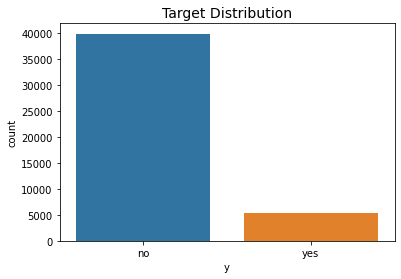

In [16]:
# term deposit plot
sns.countplot(x="y", data=bank_df1)
plt.title("Target Distribution", fontsize=14)

**OBSERVATION:**

The number of 'no's is 8 times more than 'yes'es. The output 'term deposit' is moderately imbalanced.

**Numerical Feature:**

In [17]:
# numeric features
numeric_features = [i for i in bank_df1.describe().columns if i not in ['y']]
numeric_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

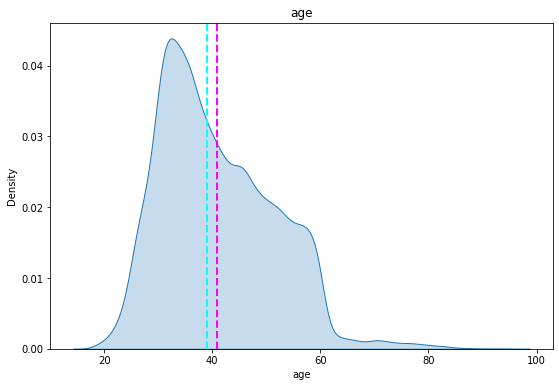

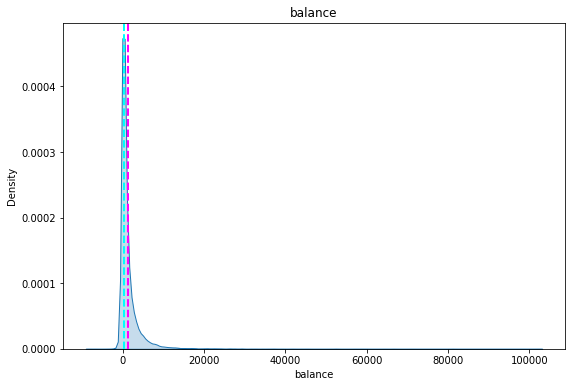

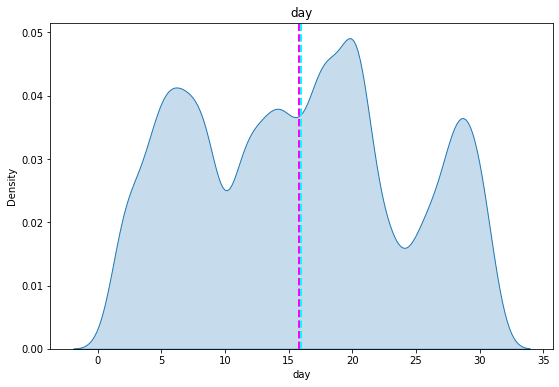

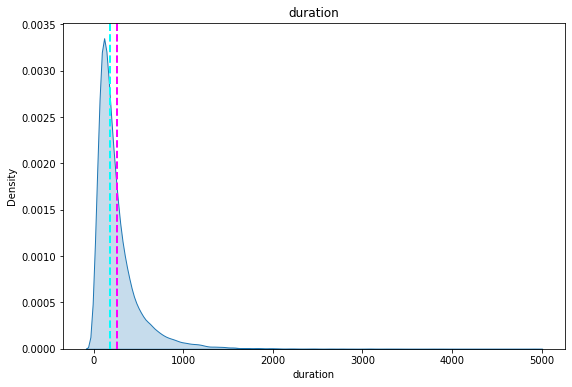

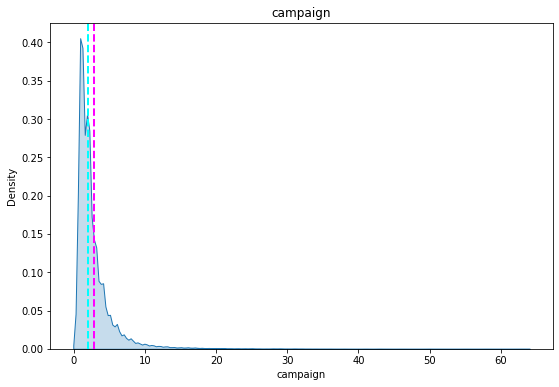

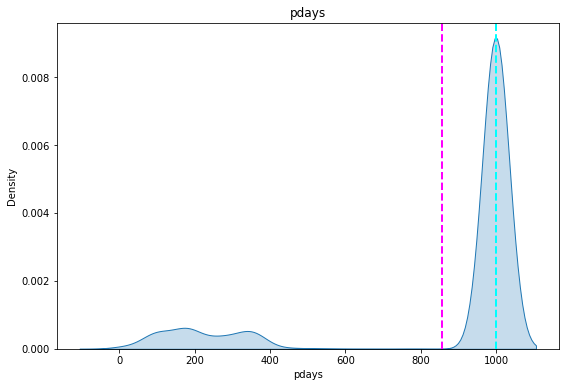

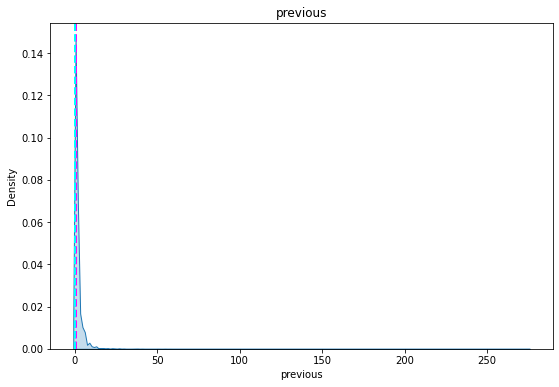

In [18]:
# Univariant analysis for each numerical feature using kdeplot
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bank_df1[col]
    sns.kdeplot(data = bank_df1, x = col, fill = True)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)

OBSERVATION:

Many features are skewed and not normally distributed. 'pdays' has many 999 entries. The other values of pdays are very small comparitively. 'previous' and 'campaign' has many 0 values.

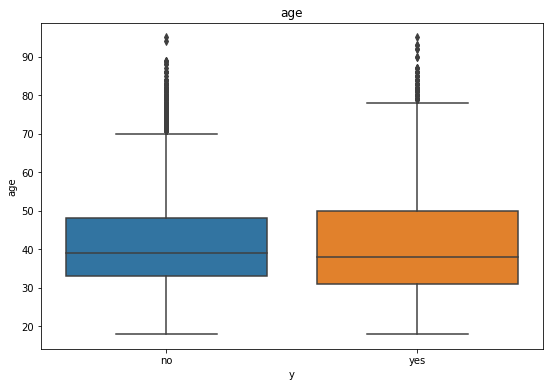

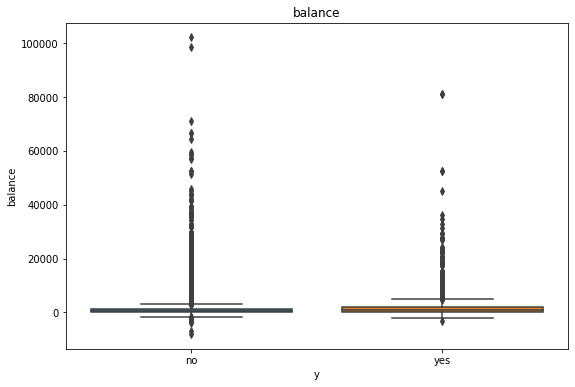

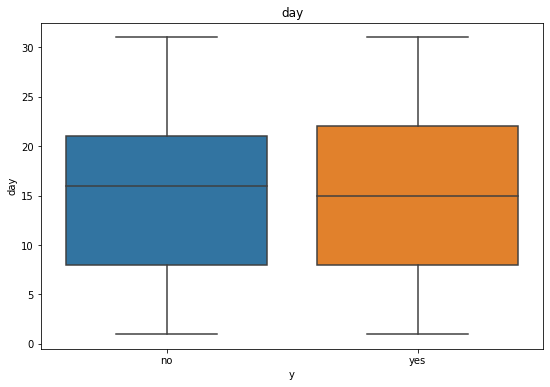

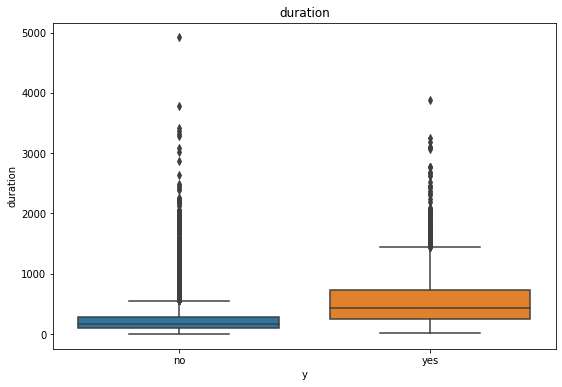

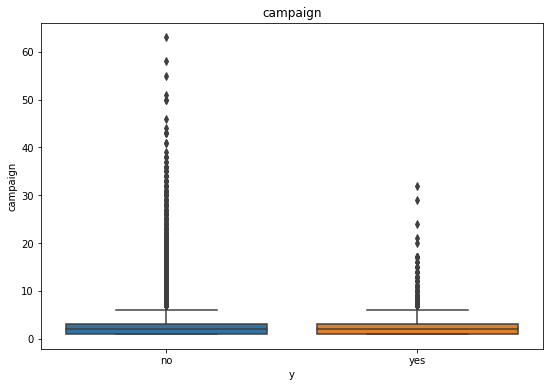

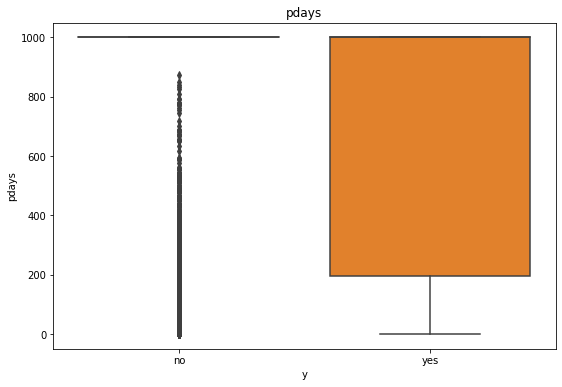

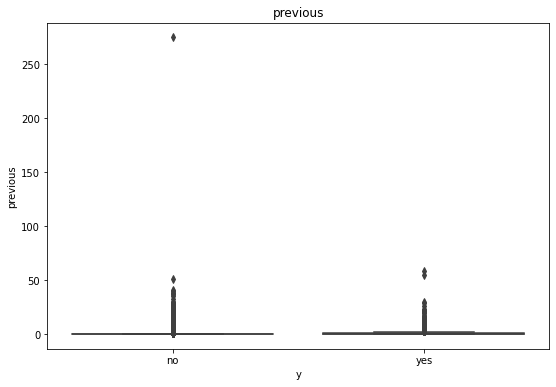

In [19]:
# bivariant analysis : between term deposit and each numeric feature.

for c in numeric_features:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  sns.boxplot(data = bank_df1, x = 'y', y = c)
  plt.title(f'{c}')

In [20]:
old_loan = len(bank_df1[(bank_df1['age'] >= 60) & (bank_df1['y'] == 'yes')])
old_noloan = len(bank_df1[(bank_df1['age'] >= 60) & (bank_df1['y'] == 'no')])
adult_loan = len(bank_df1[(bank_df1['age'] < 60) & (bank_df1['y'] == 'yes')])
adult_noloan = len(bank_df1[(bank_df1['age'] < 60) & (bank_df1['y'] == 'no')])

print(f'old people opting proportion = {old_loan/(old_loan + old_noloan)} and adults opting proportion = {adult_loan/(adult_loan + adult_noloan)}')

old people opting proportion = 0.336322869955157 and adults opting proportion = 0.10797430170170631


**OBSERVATION :**

Adults under 60 are only 10.79% likely to subscribe compared to those over 60 with 33.63%.

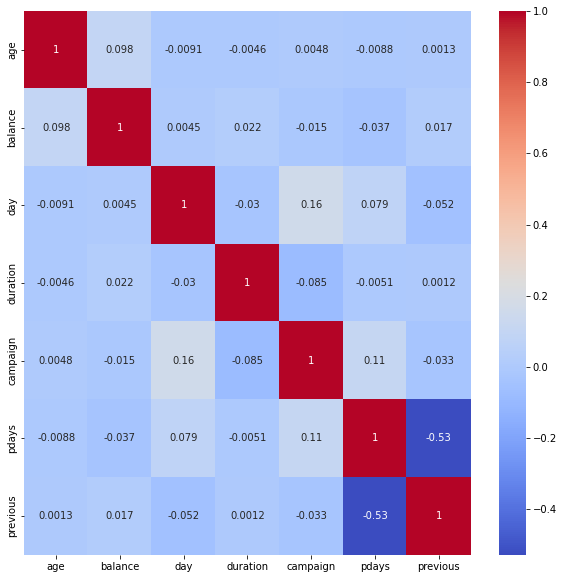

In [21]:
# Heatmap Correlation
plt.figure(figsize = (10, 10))
correlation = bank_df1.corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

In [22]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [23]:
calc_vif(bank_df1[numeric_features])

,variables,VIF
0,age,8.671256
1,balance,1.213431
2,day,4.335805
3,duration,1.944698
4,campaign,1.870290
5,pdays,8.270832
6,previous,1.281412


**Categorical Feature:**

In [24]:
# categorical_features contains all the categorical columns.
categorical_features = bank_df1.describe(include = 'object').columns
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

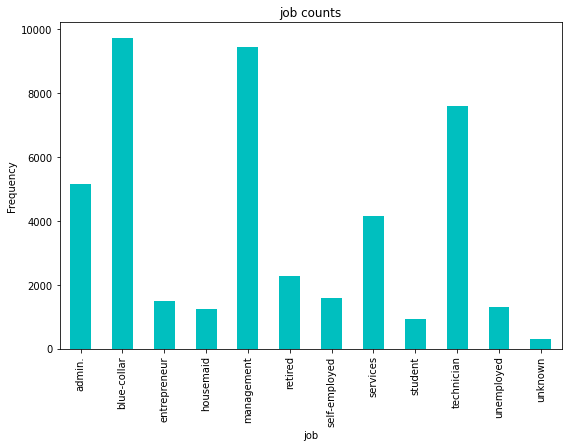

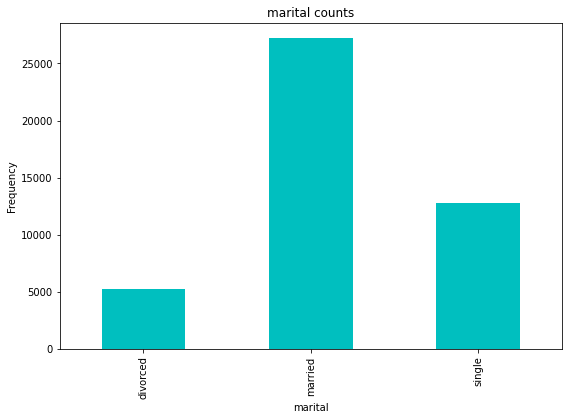

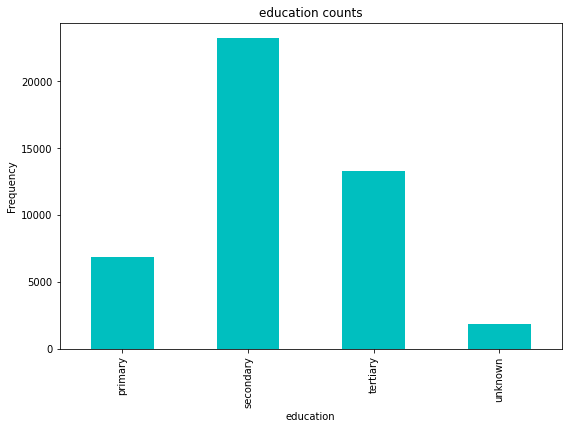

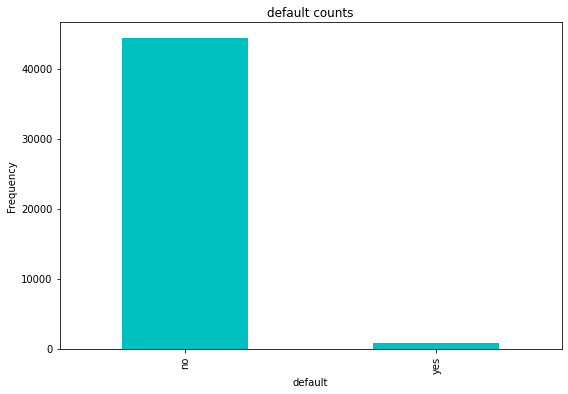

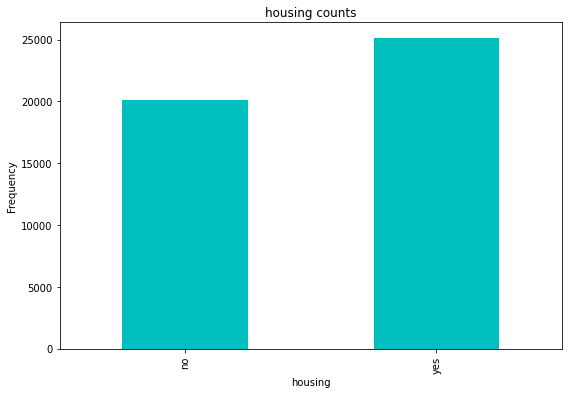

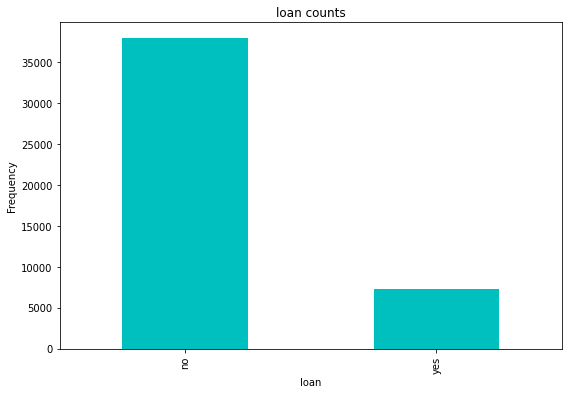

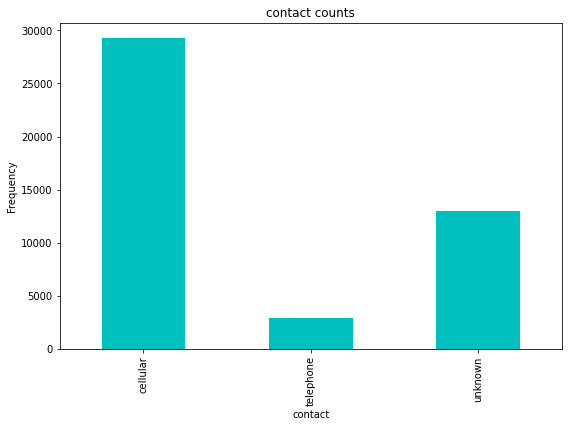

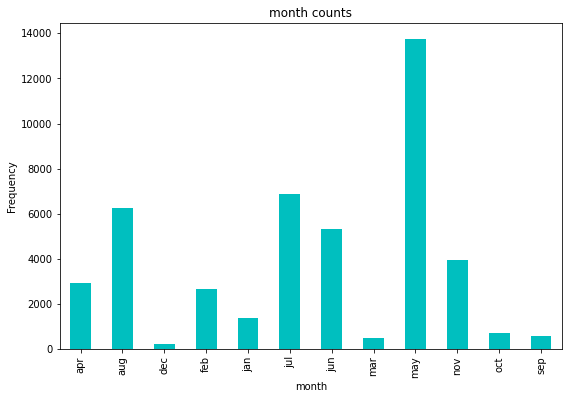

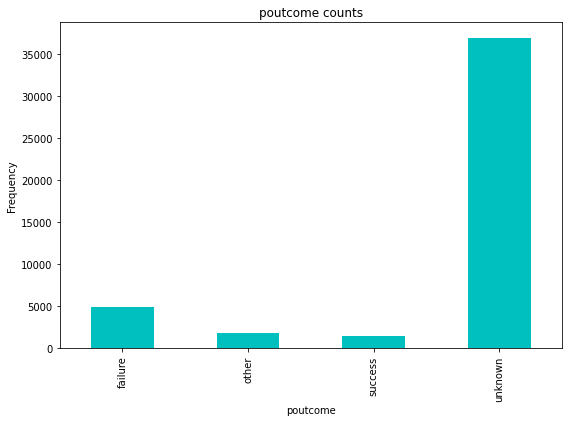

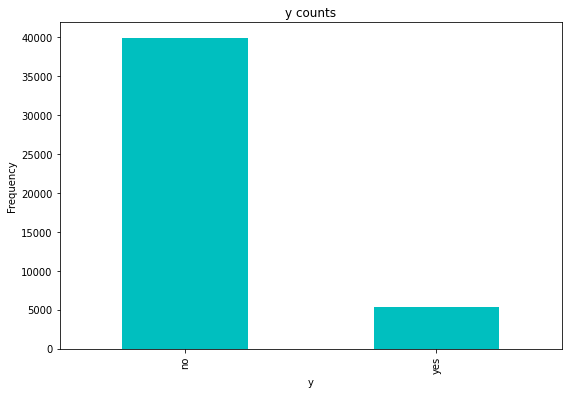

In [25]:
#Univariate Analysis of Categorical Features
for col in categorical_features:
    counts = bank_df1[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='c')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")

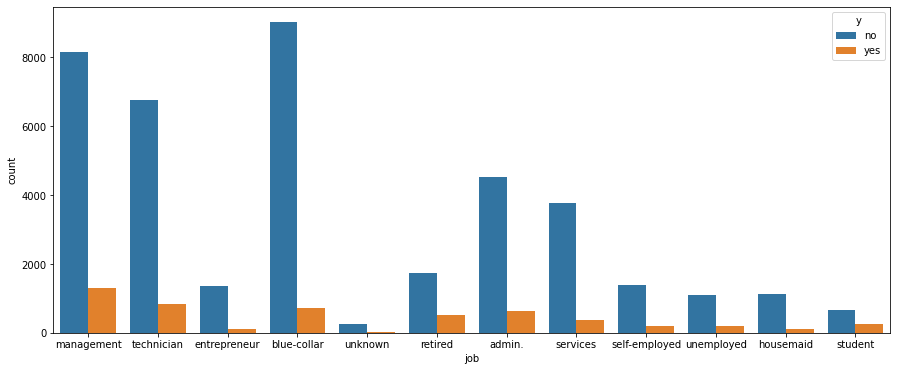

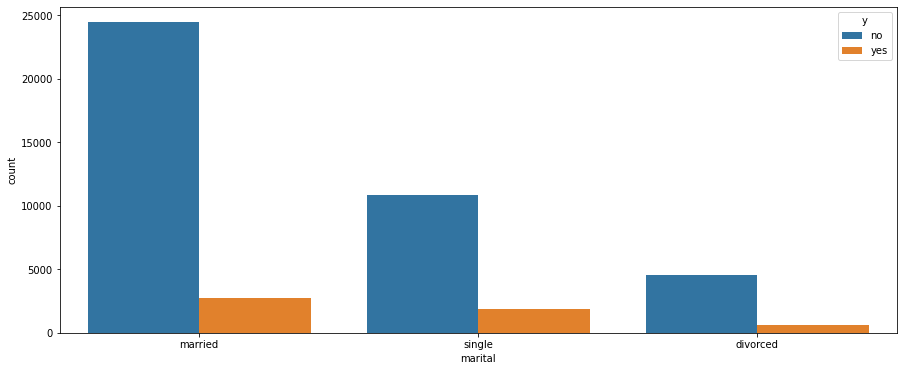

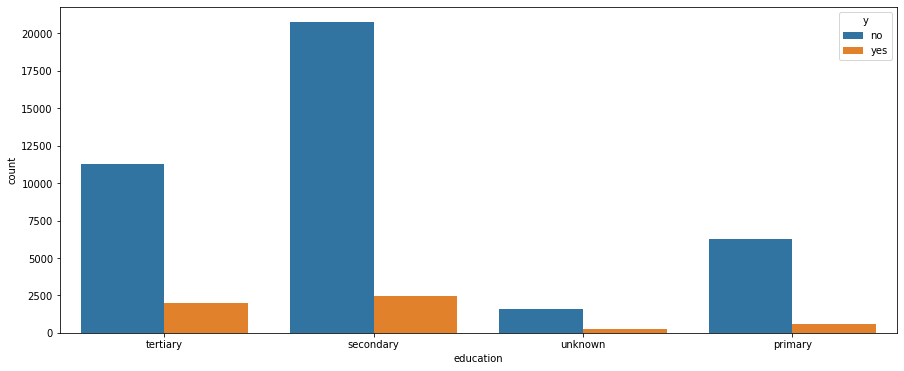

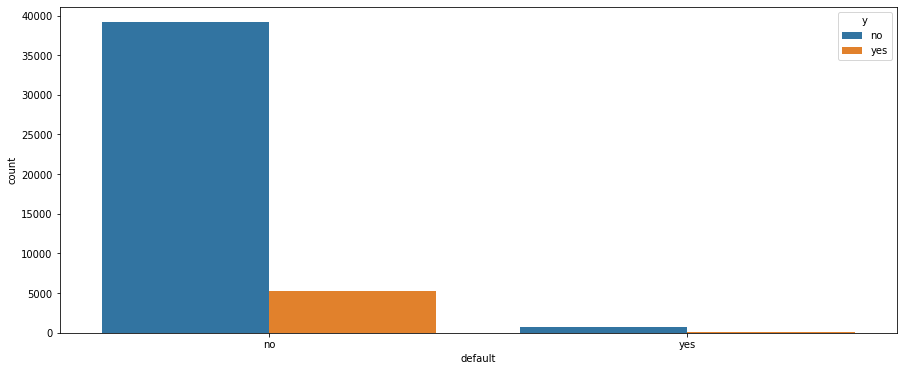

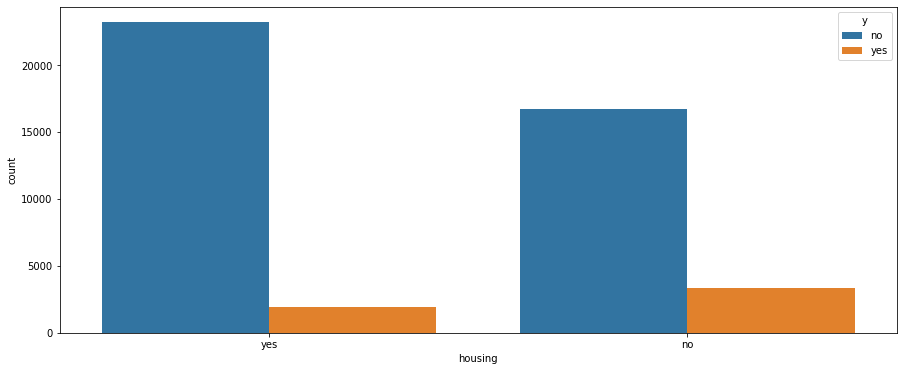

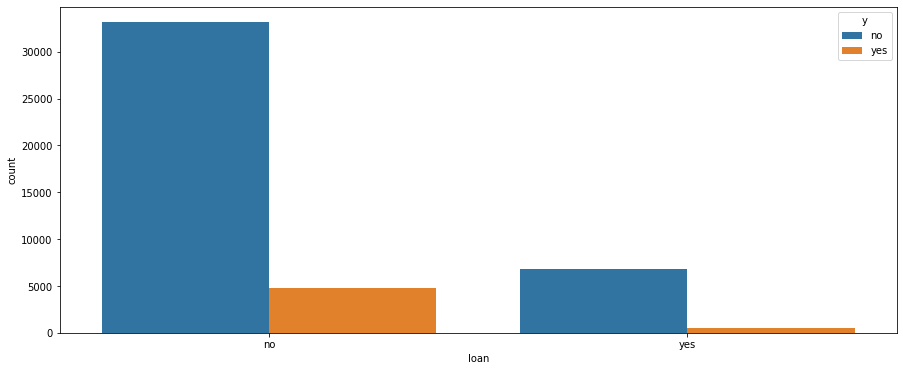

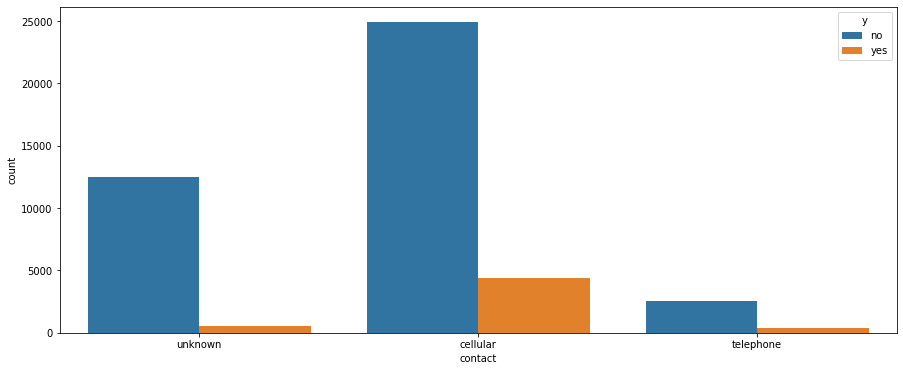

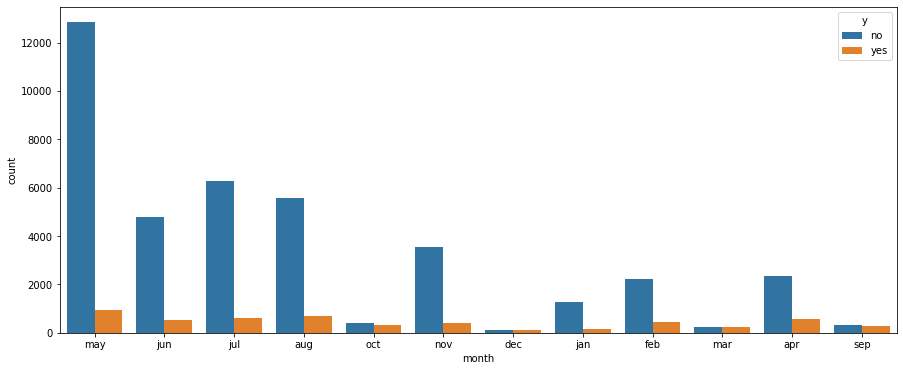

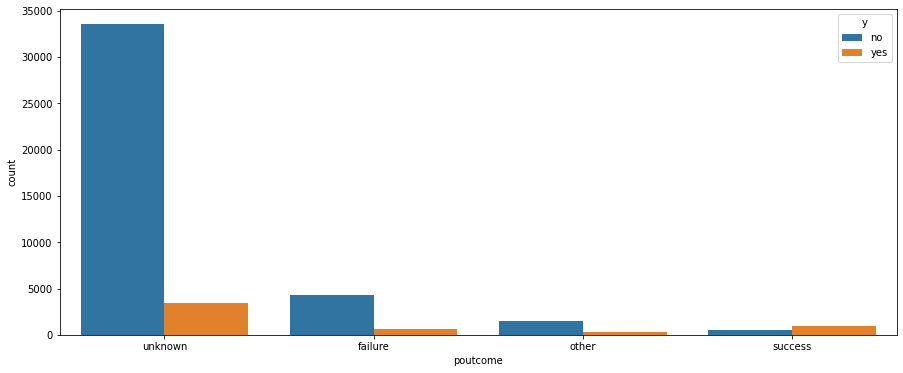

In [26]:
#Bivariate Analysis: Relationships of Categorical Features with Target
for c in [i for i in categorical_features if i not in 'y']:
  fig = plt.figure(figsize=(15, 6))
  ax = fig.gca()
  sns.countplot(data = bank_df1, hue = 'y', x = c) 

In [27]:
### Data encoding
# proportional ratio for job.
encoders_nums = {"y":{"no":0,"yes":1}}
bank_df1 = bank_df1.replace(encoders_nums)
proportion_subscribed = (bank_df1.groupby('job')['y'].sum()/bank_df1.groupby('job')['y'].count())*100
proportion_subscribed.reset_index()

,job,y
0,admin.,12.202669
1,blue-collar,7.274969
2,entrepreneur,8.271688
3,housemaid,8.790323
4,management,13.755551
5,retired,22.791519
6,self-employed,11.842939
7,services,8.883004
8,student,28.678038
9,technician,11.056996


**OBSERVATIONS:**

Although we see more subscribers from management, admin, blue collar, and technician, according to our above calculation, our term deposit subscribers are more likely to be students and retirees. Entrepreneur, self-employed - not interested in term deposit as they like to spend it in their own business.

The effect of month on target variable seems random.

In [28]:
proportion_subscribed = (bank_df1.groupby('marital')['y'].sum()/bank_df1.groupby('marital')['y'].count())*100
proportion_subscribed.reset_index()

,marital,y
0,divorced,11.945458
1,married,10.123466
2,single,14.949179


**Observations:**

The campaign did better with singles, despite the fact that there are more married clients.

In [29]:
proportion_subscribed = (bank_df1.groupby('loan')['y'].sum()/bank_df1.groupby('loan')['y'].count())*100
print(proportion_subscribed.reset_index())
proportion_subscribed = (bank_df1.groupby('housing')['y'].sum()/bank_df1.groupby('housing')['y'].count())*100
print(proportion_subscribed.reset_index())

  loan          y
0   no  12.655727
1  yes   6.681391
  housing          y
0      no  16.702355
1     yes   7.699960


**OBSERVATION SUMMARY:**

1. People in salaried positions such as admin, service, technicians, blue collar jobs, etc. subscribe to term deposits more than entrepreneurs and self-employed individuals.
2. More than married people, single people are proportionally more interested.
3. People having personal loans subscribe lesser than people with housing loan.
4. Retired people and students are proportionally more inclined to the subscribe for the term deposit.

### **Feature Engineering and Modelling**

In [30]:
bank_df2 = bank_df1.copy()

In [31]:
# dropping columns
# We could never know how many calls it takes (campaign) and how long it takes(duration) to make target value to yes.
# A client could term deposit in any month or day.
bank_df2 = bank_df2.drop(['duration', 'campaign', 'month', 'day'], axis = 1)
bank_df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [32]:
new_categorical_features = ['job','marital','education','default','housing','loan','contact','poutcome']
for i in new_categorical_features:
  print(bank_df1[i].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


In [33]:
# Delete observations having 'unknown' values in all categorical columns.
# Columns for job, education, contact, and outcome contain a 'unknown' parameter, which should be removed.
index_names= bank_df2[(bank_df2.job == 'unknown') | (bank_df2.education == 'unknown') | (bank_df2.contact == 'unknown') | (bank_df2.poutcome == 'unknown')].index
  
# drop these given row 
# indexes from dataFrame 
bank_df2.drop(index_names, inplace = True) 
bank_df2.shape

(7842, 13)

In [34]:
# After removing 'unknown' parameters.
new_categorical_features = ['job','marital','education','default','housing','loan','contact','poutcome']
for i in new_categorical_features:
  print(bank_df2[i].value_counts())

management       1753
blue-collar      1537
technician       1289
admin.           1057
services          682
retired           458
self-employed     264
student           237
entrepreneur      211
unemployed        208
housemaid         146
Name: job, dtype: int64
married     4501
single      2454
divorced     887
Name: marital, dtype: int64
secondary    4197
tertiary     2633
primary      1012
Name: education, dtype: int64
no     7786
yes      56
Name: default, dtype: int64
yes    4942
no     2900
Name: housing, dtype: int64
no     6753
yes    1089
Name: loan, dtype: int64
cellular     7257
telephone     585
Name: contact, dtype: int64
failure    4679
other      1750
success    1413
Name: poutcome, dtype: int64


In [35]:
# One-Hot Encoding.
encoding = {'default' :{'yes':1, 'no':0},
            'housing' : {'yes':1, 'no':0},
            'loan' : {'yes':1, 'no':0},
            'contact': {'cellular': 1, 'telephone':0}}
bank_df2.replace(encoding, inplace = True)

In [36]:
# Dummies of job, poutcome, education, marital.
bank_df2= pd.get_dummies(bank_df2, columns = ['job', 'poutcome', 'education', 'marital'])
bank_df2.drop(['job_unemployed', 'poutcome_other', 'education_tertiary', 'marital_single'], axis = 1, inplace = True)
bank_df2.head()

,age,default,balance,housing,loan,contact,pdays,previous,y,job_admin.,...,job_self-employed,job_services,job_student,job_technician,poutcome_failure,poutcome_success,education_primary,education_secondary,marital_divorced,marital_married
24060,33,0,882,0,0,0,151,3,0,1,...,0,0,0,0,1,0,0,0,0,1
24062,42,0,-247,1,1,0,166,1,1,1,...,0,0,0,0,0,0,0,1,0,0
24064,33,0,3444,1,0,0,91,4,1,0,...,0,1,0,0,1,0,0,1,0,1
24072,36,0,2415,1,0,0,86,4,0,0,...,0,0,0,0,0,0,0,0,0,1
24077,36,0,0,1,0,0,143,3,1,0,...,0,0,0,0,1,0,0,0,0,1


In [37]:
# pdays will tell us number of days that passed by after the client was last contacted from a previous campaign, 
# so making 999 to 0 and everything else to 1 should be sufficient to know if a person recieved the call.

bank_df2['pdays'] = np.where(bank_df2['pdays']!= 999, 1, 0)

In [38]:
features = [i for i in bank_df2.columns if i not in ['y']]

In [39]:
from sklearn.model_selection import train_test_split
X = bank_df2[features]
y = bank_df2['y']
# We will use 80-20 split with 80% of the rows belonging to training data.
# Due to the highly imbalanced dataset, stratified sampling is necessary. By stratifying, minorities are distributed proportionally between both classes.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify = bank_df2['y'])



---


**Functions Definitions**

I consider AUC metric to be the most reliable metric to predict term deposit performance. This is because we have more ‘no’s than ‘yes’es in our data, so both TPR and FPR are taken into account.

### Functions Definitions 
For printing and evaluating various metrics.

In [40]:
# function to calculate evaluation metrics - accuracy, precision, recall, f1, cm for both test and train data and return dictionary with the values for every model.
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
def cal_metric(y_test, y_test_pred, y_train, y_train_pred):

  # Calcuate accuracy, precision, recall, f1-score
  train_accuracy = accuracy_score(y_train, y_train_pred)
  train_prec = precision_score(y_train, y_train_pred)
  train_recall = recall_score(y_train, y_train_pred)
  train_f1 = f1_score(y_train, y_train_pred)

  train_cm = confusion_matrix(y_train, y_train_pred)

  test_accuracy = accuracy_score(y_test, y_test_pred)
  test_prec = precision_score(y_test, y_test_pred)
  test_recall = recall_score(y_test, y_test_pred)
  test_f1 = f1_score(y_test, y_test_pred)

  # Display confusion matrix
  test_cm = confusion_matrix(y_test, y_test_pred)

  return {'Train_accuracy': train_accuracy, 'Train_precision': train_prec, 'Train_recall': train_recall, 'Train_f1': train_f1, 'Train_cm': train_cm, \
          'Test_accuracy': test_accuracy, 'Test_precision': test_prec, 'Test_recall': test_recall, 'Test_f1': test_f1, 'Test_cm': test_cm}

In [41]:
# Plotting confusion matrix
def Map_confusion_matrix(cm, type):
  labels = ['Not Subscribed', 'Subscribed']
  print('\n')

  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('Actual labels')
  ax.set_title(f'{type} Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

In [42]:
# function cal-auc : To calculate AUC score and returns the dictionary containing the scores.
from sklearn.metrics import roc_auc_score, roc_curve
def cal_auc(model, y_test, X_test, y_train, X_train):
  # Calculate area under curve (AUC)
  # probabilty 1
  train_preds = model.predict_proba(X_train)[:,1]
  test_preds = model.predict_proba(X_test)[:,1]
  fpr, tpr, thresholds = roc_curve(y_test, test_preds)
  auc_test = roc_auc_score(y_test, test_preds)
  auc_train = roc_auc_score(y_train, train_preds)
  return {'AUC_test': auc_test, 'AUC_train': auc_train, 'fpr': fpr, 'tpr': tpr}

In [43]:
# Function to print all evaluation metrics in a table and plot confusion metrics.
# import module
from tabulate import tabulate

# Print result
def print_metric_eval(met_eval):
  # assign data
  mydata = [
      ['Train Accuracy:', met_eval['Train_accuracy']],
      ['Train Precision:', met_eval['Train_precision']],
      ['Train Recall:', met_eval['Train_recall']],
      ['Train F1 Score:', met_eval['Train_f1']],
      ['Train Confusion Matrix:\n', met_eval['Train_cm']],
      ["Test Accuracy", met_eval['Test_accuracy']],
      ['Test Precision:', met_eval['Test_precision']],
      ['Test Recall:', met_eval['Test_recall']],
      ['Test F1 Score:', met_eval['Test_f1']],
      ['Test Confusion Matrix:\n', met_eval['Test_cm']]
  ]

  # create header
  head = ["Evaluation Metrics", "Value"]

  print(tabulate(mydata, headers=head, tablefmt="grid"))

  fig = plt.figure(1)
  Map_confusion_matrix(met_eval['Train_cm'], 'Train')

  fig1 = plt.figure(2)
  Map_confusion_matrix(met_eval['Test_cm'], 'Test')

In [135]:
# feature importance plot
def plot_feature_impor(model, i):
  importances = model[0].feature_importances_
  indices = np.argsort(importances)
  plt.figure(i, figsize = (15, 8))
  plt.title(f'{model[1]} Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

### **Logistic Regression**

In [45]:
from sklearn.linear_model import LogisticRegression

#logistic regression fit
log_reg = LogisticRegression(fit_intercept=True, max_iter=10000)
log_reg.fit(X_train, y_train)
# Get the model coefficients
print(f'Model Coefficients: \n\n{log_reg.coef_}\n')
# Get the intercept
print(f'Intercept: \n\n{log_reg.intercept_}')

Model Coefficients: 

[[-9.20248349e-05 -1.39509026e-01  1.87452926e-05 -1.03756746e+00
  -6.09397479e-01  2.38075787e-01 -4.60200815e-01  8.97224062e-03
   3.00293325e-02 -4.05046029e-01 -2.76450144e-01 -3.68996332e-02
  -3.50346308e-02  2.48492923e-01  3.29431781e-03 -1.87369737e-01
   1.78036032e-01 -2.64852314e-01 -2.28471793e-01  1.90652574e+00
  -3.39938132e-01 -1.97405311e-01 -2.39064718e-01 -7.54353143e-02]]

Intercept: 

[-0.46550784]


[Text(0, 0.5, 'Coefficients value'), Text(0.5, 1.0, 'Features')]

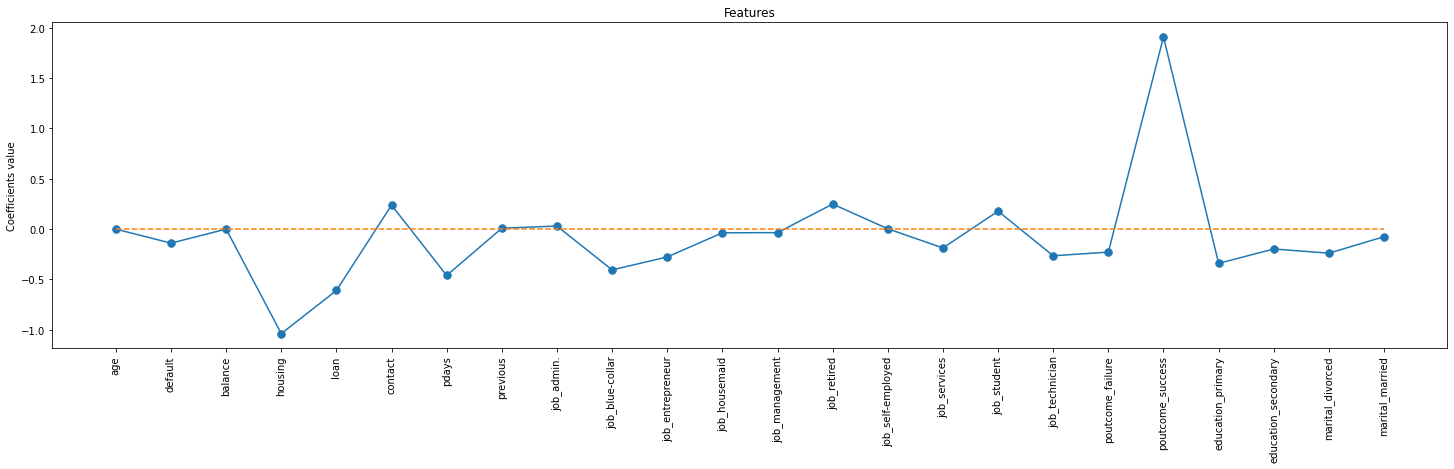

In [46]:
# Plotting the Coefficients
fig = plt.figure(figsize=(25, 6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(log_reg.coef_[0], marker='.', markersize=15)
axes.plot([0] * len(features), '--')
plt.xticks(range(len(log_reg.coef_[0])), labels = features, rotation=90)
axes.set(ylabel='Coefficients value', title='Features')

Based on the above plot, we can see that age, married people, self-employed, housemaid, admin, balance, etc., have very little effect on term deposits.

In [47]:
# Get the predicted classes
train_class_preds = log_reg.predict(X_train)
test_class_preds = log_reg.predict(X_test)

In [48]:
train_class_preds

array([0, 0, 0, ..., 0, 1, 0])

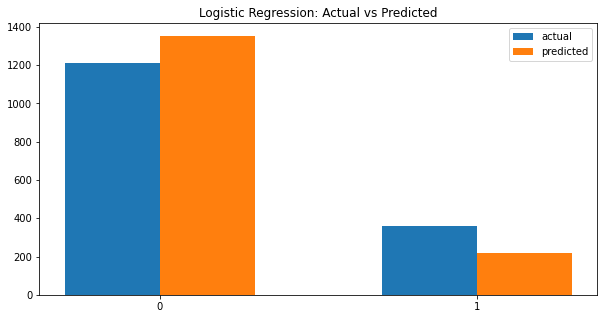

In [49]:
# Numbers of pairs of bars you want
N = 2

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, [y_test.value_counts()[0], y_test.value_counts()[1]] , width, label='actual')
plt.bar(ind + width, [pd.Series(test_class_preds).value_counts()[0], pd.Series(test_class_preds).value_counts()[1]], width, label='predicted')
plt.title('Logistic Regression: Actual vs Predicted')
plt.xticks(ind + width / 2, ('0', '1'))
plt.legend(loc='best')

+-------------------------+---------------------+
| Evaluation Metrics      | Value               |
+=========================+=====================+
| Train Accuracy:         | 0.8260800255061375  |
+-------------------------+---------------------+
| Train Precision:        | 0.6886160714285714  |
+-------------------------+---------------------+
| Train Recall:           | 0.43177046885934217 |
+-------------------------+---------------------+
| Train F1 Score:         | 0.530752688172043   |
+-------------------------+---------------------+
| Train Confusion Matrix: | [[4565  279]        |
|                         |  [ 812  617]]       |
+-------------------------+---------------------+
| Test Accuracy           | 0.8253664754620778  |
+-------------------------+---------------------+
| Test Precision:         | 0.6912442396313364  |
+-------------------------+---------------------+
| Test Recall:            | 0.42016806722689076 |
+-------------------------+---------------------+


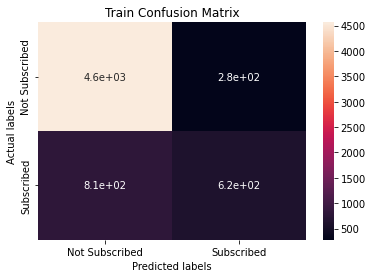

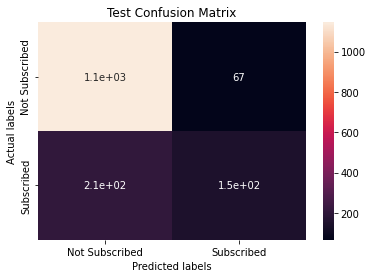

In [50]:
# Evaluate models
lr_eval = cal_metric(y_test, test_class_preds, y_train, train_class_preds)

# Print result
print_metric_eval(lr_eval)

In [51]:
# Evaluate AUC
lr_eval_auc = cal_auc(log_reg, y_test, X_test, y_train, X_train)
print('Test AUC:', lr_eval_auc['AUC_test'])
print('Train AUC:', lr_eval_auc['AUC_train'])

Test AUC: 0.7958602582947369
Train AUC: 0.812855204132402


**OBSERVATION:**
1. Although it appears that the model did a good job predicting non-subscribers, it failed to get the correct number of predictions for subscribers.
2. Test recall of 0.42 indicates that the model failed to predict subscribers properly. The train data or the test data do not differ greatly in their metrics.
3. In this test, the AUC is 0.796, which is quite decent. Let's look at further models.

### **Decision Tree**

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# hyperparameter tuning
param_grid = {'criterion' :['gini', 'entropy'], 'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
tree_clas = DecisionTreeClassifier(random_state=0)
# GridSearchCV
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)
# Best Estimator parameter
final_model = grid_search.best_estimator_
final_model

Fitting 5 folds for each of 36 candidates, totalling 180 fits


DecisionTreeClassifier(max_depth=5, random_state=0)

In [53]:
#Training the model
dt_clas = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
dt_clas.fit(X_train, y_train)
y_test_predict = dt_clas.predict(X_test)
y_train_predict = dt_clas.predict(X_train)

In [54]:
y_test_predict

array([0, 0, 0, ..., 0, 1, 1])

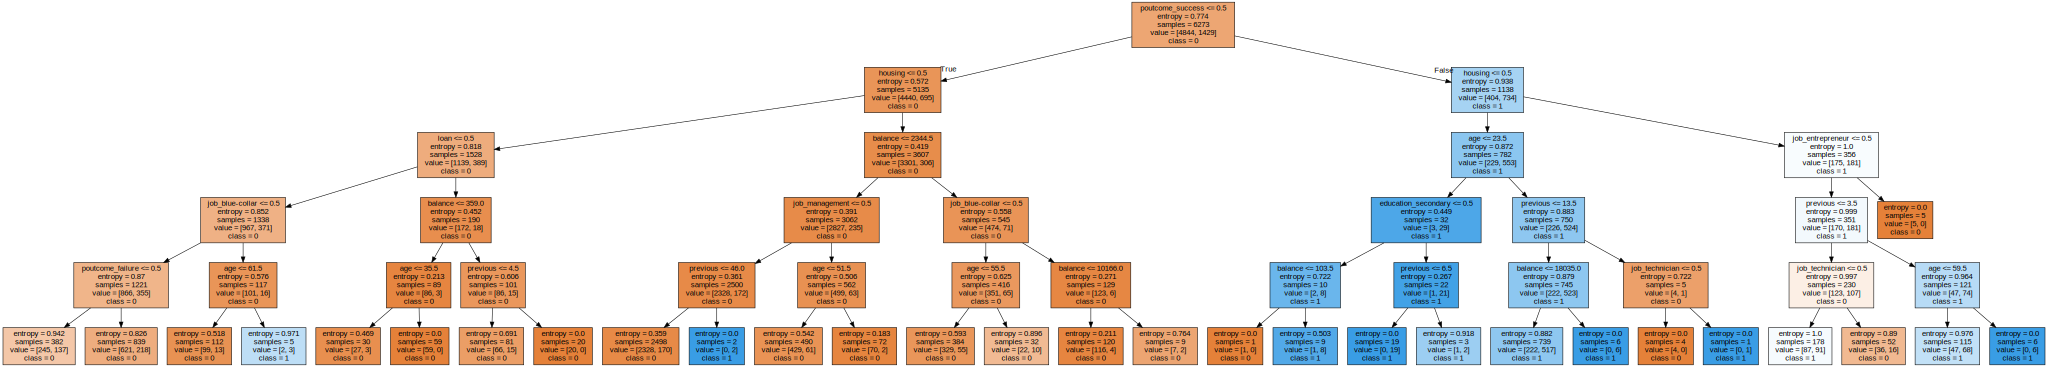

In [55]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(tree.export_graphviz(dt_clas, out_file=None, feature_names=features, class_names=['0', '1'], filled = True))
display(SVG(graph.pipe(format='svg')))

+-------------------------+---------------------+
| Evaluation Metrics      | Value               |
+=========================+=====================+
| Train Accuracy:         | 0.8300653594771242  |
+-------------------------+---------------------+
| Train Precision:        | 0.667590027700831   |
+-------------------------+---------------------+
| Train Recall:           | 0.5059482155353394  |
+-------------------------+---------------------+
| Train F1 Score:         | 0.5756369426751592  |
+-------------------------+---------------------+
| Train Confusion Matrix: | [[4484  360]        |
|                         |  [ 706  723]]       |
+-------------------------+---------------------+
| Test Accuracy           | 0.8234544295729764  |
+-------------------------+---------------------+
| Test Precision:         | 0.6515151515151515  |
+-------------------------+---------------------+
| Test Recall:            | 0.48179271708683474 |
+-------------------------+---------------------+


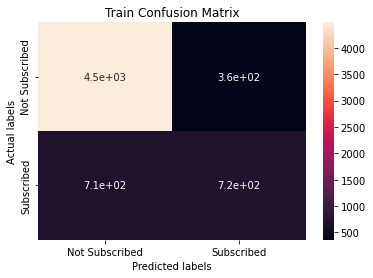

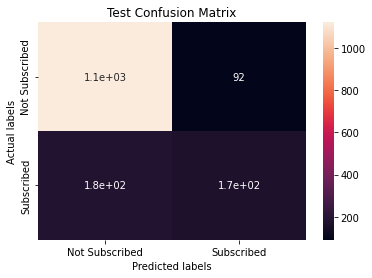

In [56]:
# Evaluate models
dt_eval = cal_metric(y_test, y_test_predict, y_train, y_train_predict)

# Print result
print_metric_eval(dt_eval)

In [57]:
# Evaluate AUC
dt_eval_auc = cal_auc(dt_clas, y_test, X_test, y_train, X_train)
print('Test AUC:', dt_eval_auc['AUC_test'])
print('Train AUC:', dt_eval_auc['AUC_train'])

Test AUC: 0.7859350010631316
Train AUC: 0.8175012814074853


**OBSERVATION:**
1. Recall for decision tree has surely improved over logistic regression.
2. Decision trees still outperform logistic regression models even though precision has decreased because recall has improved and I believe recall should be more important than precision.

### **Random Forest Classifier**

In [85]:
# Hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state = 0) # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 80,  100, 200, 300], 'max_depth':[4, 6, 8, 10, 12], 'criterion': ['gini', 'entropy']}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(X_train, y_train)
classifier.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 200}

In [86]:
train_preds = classifier.predict(X_train)
test_preds = classifier.predict(X_test)

+-------------------------+---------------------+
| Evaluation Metrics      | Value               |
+=========================+=====================+
| Train Accuracy:         | 0.8289494659652479  |
+-------------------------+---------------------+
| Train Precision:        | 0.7230576441102757  |
+-------------------------+---------------------+
| Train Recall:           | 0.40377886634009796 |
+-------------------------+---------------------+
| Train F1 Score:         | 0.5181859003143242  |
+-------------------------+---------------------+
| Train Confusion Matrix: | [[4623  221]        |
|                         |  [ 852  577]]       |
+-------------------------+---------------------+
| Test Accuracy           | 0.8183556405353728  |
+-------------------------+---------------------+
| Test Precision:         | 0.6836734693877551  |
+-------------------------+---------------------+
| Test Recall:            | 0.3753501400560224  |
+-------------------------+---------------------+


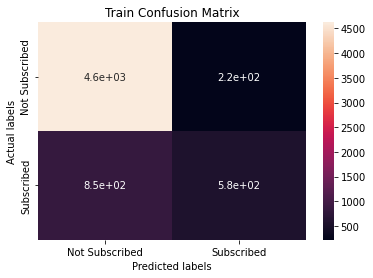

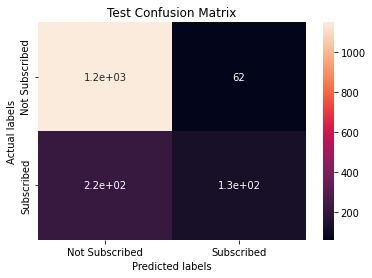

In [87]:
# Evaluate models
rf_eval = cal_metric(y_test, test_preds, y_train, train_preds)

# Print result
print_metric_eval(rf_eval)

In [88]:
# Evaluate AUC
rf_eval_auc = cal_auc(classifier, y_test, X_test, y_train, X_train)
print('Test AUC:', rf_eval_auc['AUC_test'])
print('Train AUC:', rf_eval_auc['AUC_train'])

Test AUC: 0.7960717290216416
Train AUC: 0.835821941278888


**OBSERVATION:**

1. While AUC is the same as decision tree, other metrics such as recall and precision have decreased.
2. Random Forest is surely not the right model for this project.

### **KNN**

In [62]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Tuning hyperparameter - n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_test, y_test)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [63]:
knn_cv.best_score_

0.7724669827638836

In [64]:
knn_cv.best_params_

{'n_neighbors': 40}

In [65]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors = 40)

# Fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=40)

In [66]:
train_preds_knn = knn.predict(X_train)
test_preds_knn = knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


+-------------------------+-----------------------+
| Evaluation Metrics      | Value                 |
+=========================+=======================+
| Train Accuracy:         | 0.7725171369360753    |
+-------------------------+-----------------------+
| Train Precision:        | 1.0                   |
+-------------------------+-----------------------+
| Train Recall:           | 0.0013995801259622112 |
+-------------------------+-----------------------+
| Train F1 Score:         | 0.0027952480782669456 |
+-------------------------+-----------------------+
| Train Confusion Matrix: | [[4844    0]          |
|                         |  [1427    2]]         |
+-------------------------+-----------------------+
| Test Accuracy           | 0.7724665391969407    |
+-------------------------+-----------------------+
| Test Precision:         | 0.0                   |
+-------------------------+-----------------------+
| Test Recall:            | 0.0                   |
+-----------

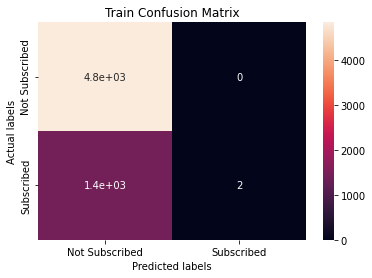

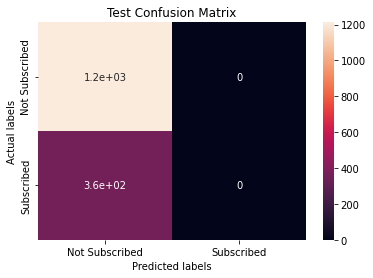

In [67]:
# Evaluate models
knn_eval = cal_metric(y_test, test_preds_knn, y_train, train_preds_knn)

# Print result
print_metric_eval(knn_eval)

In [68]:
# Evaluate AUC
knn_eval_auc = cal_auc(knn, y_test, X_test, y_train, X_train)
print('Test AUC:', knn_eval_auc['AUC_test'])
print('Train AUC:', knn_eval_auc['AUC_train'])

Test AUC: 0.6110140425807286
Train AUC: 0.6717204491831643


**OBERVATION:**

1. As we know that our data is imbalanced and this is a classic example to show that the performance of k-NN classifiers will be significantly impacted by the imbalanced class distributions of data.
2. This model is by far the worst one.

### **Naive Bayes** 

In [69]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)
train_preds_nb = nb.predict(X_train)
test_preds_nb = nb.predict(X_test)

+-------------------------+--------------------+
| Evaluation Metrics      | Value              |
+=========================+====================+
| Train Accuracy:         | 0.779212498007333  |
+-------------------------+--------------------+
| Train Precision:        | 0.5126728110599078 |
+-------------------------+--------------------+
| Train Recall:           | 0.622813156053184  |
+-------------------------+--------------------+
| Train F1 Score:         | 0.5624012638230647 |
+-------------------------+--------------------+
| Train Confusion Matrix: | [[3998  846]       |
|                         |  [ 539  890]]      |
+-------------------------+--------------------+
| Test Accuracy           | 0.7807520713830465 |
+-------------------------+--------------------+
| Test Precision:         | 0.5158150851581509 |
+-------------------------+--------------------+
| Test Recall:            | 0.5938375350140056 |
+-------------------------+--------------------+
| Test F1 Score:    

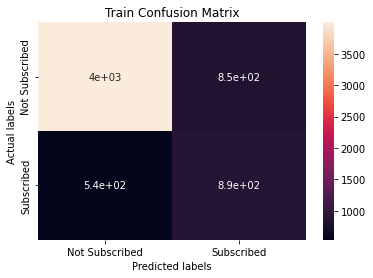

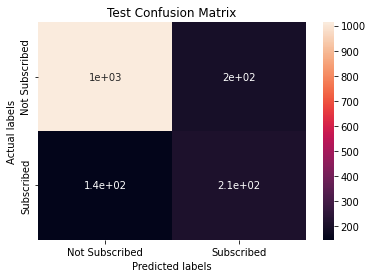

In [70]:
# Evaluate models
nb_eval = cal_metric(y_test, test_preds_nb, y_train, train_preds_nb)

# Print result
print_metric_eval(nb_eval)

In [71]:
# Evaluate AUC
nb_eval_auc = cal_auc(nb, y_test, X_test, y_train, X_train)
print('Test AUC:', nb_eval_auc['AUC_test'])
print('Train AUC:', nb_eval_auc['AUC_train'])

Test AUC: 0.7659885736472807
Train AUC: 0.7857850014937716


**OBSERVATION:**

1. Even though AUC has not improved, we see an improvement in recall and precision which makes Naive Bayes the best model.

### Model Comparison

In [83]:
mydata = [
      ['Train Accuracy:', lr_eval['Train_accuracy'], dt_eval['Train_accuracy'], rf_eval['Train_accuracy'], knn_eval['Train_accuracy'], nb_eval['Train_accuracy']],
      ['Train Precision:', lr_eval['Train_precision'], dt_eval['Train_precision'], rf_eval['Train_precision'], knn_eval['Train_precision'], nb_eval['Train_precision']],
      ['Train Recall:', lr_eval['Train_recall'], dt_eval['Train_recall'], rf_eval['Train_recall'], knn_eval['Train_recall'], nb_eval['Train_recall']],
      ['Train F1 Score:', lr_eval['Train_f1'], dt_eval['Train_f1'], rf_eval['Train_f1'], knn_eval['Train_f1'], nb_eval['Train_f1']],
      ['Train Confusion Matrix:\n', lr_eval['Train_cm'], dt_eval['Train_cm'], rf_eval['Train_cm'], knn_eval['Train_cm'], nb_eval['Train_cm']],
      ["Test Accuracy", lr_eval['Test_accuracy'], dt_eval['Test_accuracy'], rf_eval['Test_accuracy'], knn_eval['Test_accuracy'], nb_eval['Test_accuracy']],
      ['Test Precision:', lr_eval['Test_precision'], dt_eval['Test_precision'], rf_eval['Test_precision'], knn_eval['Test_precision'], nb_eval['Test_precision']],
      ['Test Recall:', lr_eval['Test_recall'], dt_eval['Test_recall'], rf_eval['Test_recall'], knn_eval['Test_recall'], nb_eval['Test_recall']],
      ['Test F1 Score:', lr_eval['Test_f1'], dt_eval['Test_f1'], rf_eval['Test_f1'], knn_eval['Test_f1'], nb_eval['Test_f1']],
      ['Test Confusion Matrix:\n', lr_eval['Test_cm'], dt_eval['Test_cm'], rf_eval['Test_cm'], knn_eval['Test_cm'], nb_eval['Test_cm']]
]

  # create header
head = ["Evaluation Metrics", "Logistic Regression", 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes']

print(tabulate(mydata, headers=head, tablefmt="grid"))

+-------------------------+-----------------------+---------------------+---------------------+-----------------------+--------------------+
| Evaluation Metrics      | Logistic Regression   | Decision Tree       | Random Forest       | KNN                   | Naive Bayes        |
+=========================+=======================+=====================+=====================+=======================+====================+
| Train Accuracy:         | 0.8260800255061375    | 0.8300653594771242  | 0.8289494659652479  | 0.7725171369360753    | 0.779212498007333  |
+-------------------------+-----------------------+---------------------+---------------------+-----------------------+--------------------+
| Train Precision:        | 0.6886160714285714    | 0.667590027700831   | 0.7230576441102757  | 1.0                   | 0.5126728110599078 |
+-------------------------+-----------------------+---------------------+---------------------+-----------------------+--------------------+
| Train Recal

Text(0.5, 1.0, 'Logistic Regression Feature importance')

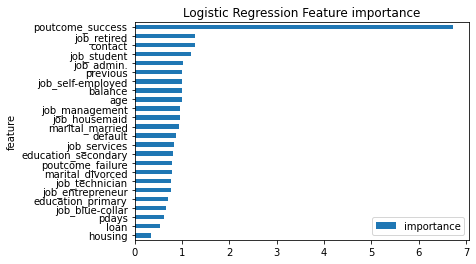

In [143]:
# plot for logistic regression feature importance.

from scipy import stats
# Calculating importance of each feature.
feature_importance = pd.DataFrame(features, columns = ["feature"])
feature_importance["importance"] = pow(math.e, log_reg.coef_[0])
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)

# barh plot.
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.title('Logistic Regression Feature importance')

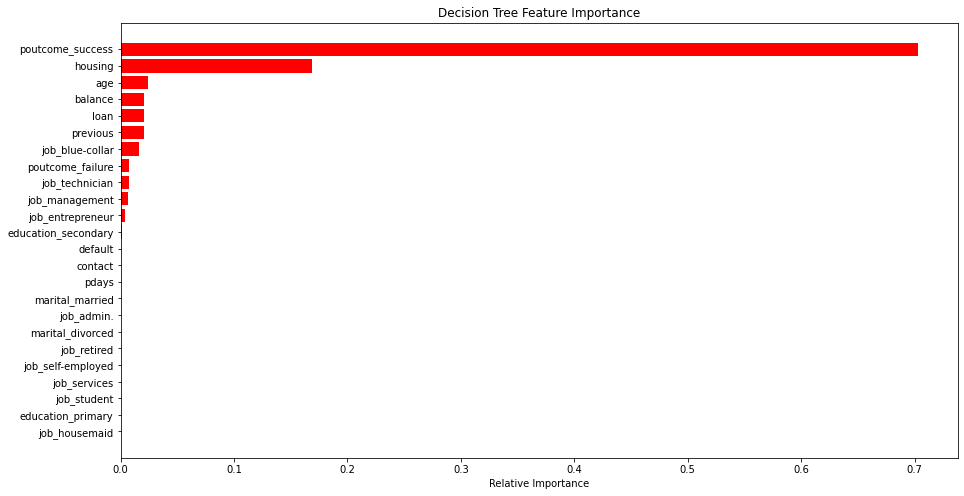

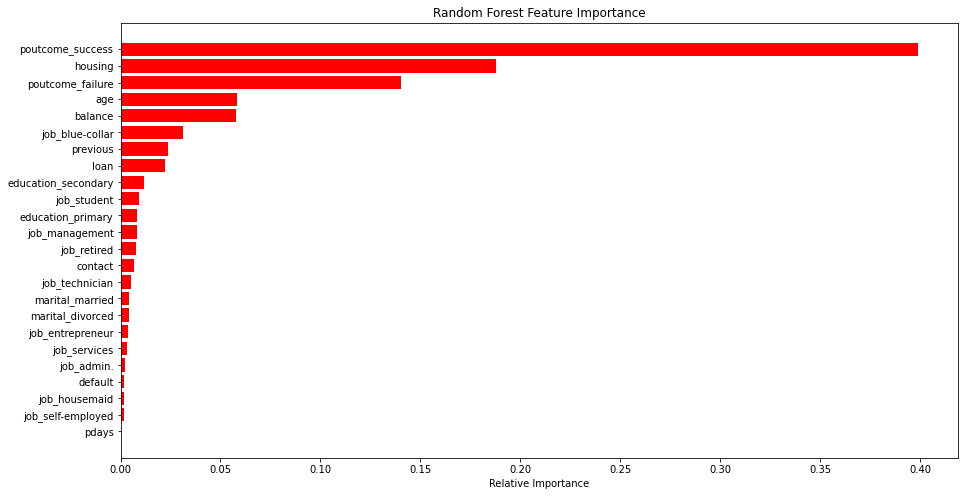

In [136]:
# plot for DT, RF feature importance.
for i,model in enumerate([[dt_clas, 'Decision Tree'], [classifier.best_estimator_, 'Random Forest']]):
  # plot feature importance by calling plot_feature_impor function.
  plot_feature_impor(model, i)

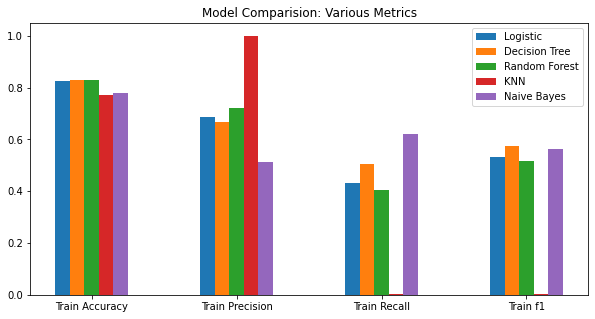

In [140]:
# plot for various train data metrics for all the models.

# Numbers of pairs of bars you want
N = 4

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.1    

# Plotting
plt.bar(ind, [lr_eval['Train_accuracy'], lr_eval['Train_precision'], lr_eval['Train_recall'], lr_eval['Train_f1']] , width, label='Logistic')
plt.bar(ind+width, [dt_eval['Train_accuracy'], dt_eval['Train_precision'], dt_eval['Train_recall'], dt_eval['Train_f1']] , width, label='Decision Tree')
plt.bar(ind+2*width, [rf_eval['Train_accuracy'], rf_eval['Train_precision'], rf_eval['Train_recall'], rf_eval['Train_f1']] , width, label='Random Forest')
plt.bar(ind+3*width, [knn_eval['Train_accuracy'], knn_eval['Train_precision'], knn_eval['Train_recall'], knn_eval['Train_f1']] , width, label='KNN')
plt.bar(ind+4*width, [nb_eval['Train_accuracy'], nb_eval['Train_precision'], nb_eval['Train_recall'], nb_eval['Train_f1']] , width, label='Naive Bayes')

plt.title('Model Comparision: Various Metrics')
plt.xticks(ind + 2*width, ('Train Accuracy', 'Train Precision', 'Train Recall', 'Train f1'))
plt.legend(loc='best')

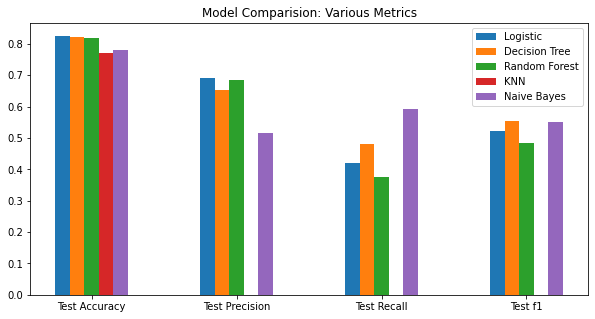

In [139]:
# plot for various test data metrics for all the models.

# Numbers of pairs of bars you want
N = 4

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.1    

# Plotting
plt.bar(ind, [lr_eval['Test_accuracy'], lr_eval['Test_precision'], lr_eval['Test_recall'], lr_eval['Test_f1']] , width, label='Logistic')
plt.bar(ind+width, [dt_eval['Test_accuracy'], dt_eval['Test_precision'], dt_eval['Test_recall'], dt_eval['Test_f1']] , width, label='Decision Tree')
plt.bar(ind+2*width, [rf_eval['Test_accuracy'], rf_eval['Test_precision'], rf_eval['Test_recall'], rf_eval['Test_f1']] , width, label='Random Forest')
plt.bar(ind+3*width, [knn_eval['Test_accuracy'], knn_eval['Test_precision'], knn_eval['Test_recall'], knn_eval['Test_f1']] , width, label='KNN')
plt.bar(ind+4*width, [nb_eval['Test_accuracy'], nb_eval['Test_precision'], nb_eval['Test_recall'], nb_eval['Test_f1']] , width, label='Naive Bayes')

plt.title('Model Comparision: Various Metrics')
plt.xticks(ind + 2*width, ('Test Accuracy', 'Test Precision', 'Test Recall', 'Test f1'))
plt.legend(loc='best')

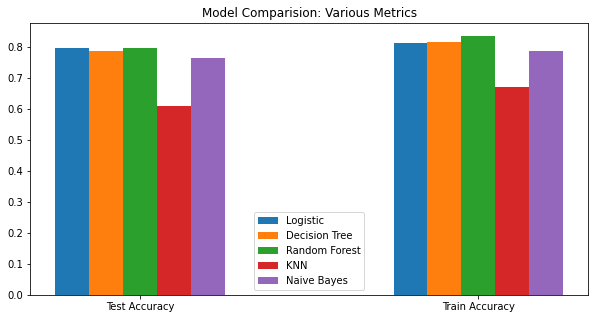

In [141]:
# Plot Accuracy for all models.
# Numbers of pairs of bars you want
N = 2

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.1    

# Plotting
plt.bar(ind, [lr_eval_auc['AUC_test'], lr_eval_auc['AUC_train']], width, label='Logistic')
plt.bar(ind+width, [dt_eval_auc['AUC_test'], dt_eval_auc['AUC_train']] , width, label='Decision Tree')
plt.bar(ind+2*width, [rf_eval_auc['AUC_test'], rf_eval_auc['AUC_train']] , width, label='Random Forest')
plt.bar(ind+3*width, [knn_eval_auc['AUC_test'], knn_eval_auc['AUC_train']] , width, label='KNN')
plt.bar(ind+4*width, [nb_eval_auc['AUC_test'], nb_eval_auc['AUC_train']] , width, label='Naive Bayes')

plt.title('Model Comparision: Various Metrics')
plt.xticks(ind + 2*width, ('Test Accuracy', 'Train Accuracy', 'Precision', 'Recall', 'f1'))
plt.legend(loc='best')

Text(0.5, 1.0, 'Model Comparision: ROC curve')

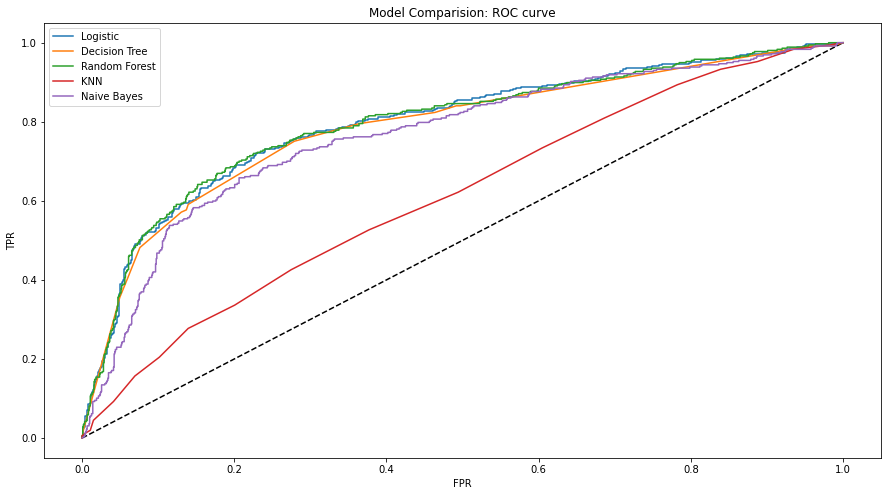

In [142]:
# Plot for ROC curve for various models.
plt.figure(figsize = (15, 8))
plt.plot([0,1],[0,1],'k--')
plt.plot(lr_eval_auc['fpr'], lr_eval_auc['tpr'], label = 'Logistic')
plt.plot(dt_eval_auc['fpr'], dt_eval_auc['tpr'], label = 'Decision Tree')
plt.plot(rf_eval_auc['fpr'], rf_eval_auc['tpr'], label = 'Random Forest')
plt.plot(knn_eval_auc['fpr'], knn_eval_auc['tpr'], label = 'KNN')
plt.plot(nb_eval_auc['fpr'], nb_eval_auc['tpr'], label = 'Naive Bayes')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Model Comparision: ROC curve')

**CONCLUSION:**

* **Key features with most importance:**

1. The key features or attributes that helped in the prediction of the class variable were - poutcome, age, balance, previous, 


